# Matplotlib Visualization Examples

- 官方colormap: https://matplotlib.org/tutorials/colors/colormaps.html
- 官方颜色表：https://blog.csdn.net/weixin_42643547/article/details/103683412
- 配色网站：https://colorhunt.co/palettes/popular
- 配色网站：https://colorbrewer2.org/#type=sequential&scheme=BuGn&n=3
- plt style: https://matplotlib.org/3.1.1/gallery/style_sheets/style_sheets_reference.html & https://jakevdp.github.io/PythonDataScienceHandbook/04.11-settings-and-stylesheets.html

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.pyplot import MultipleLocator
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import FuncFormatter
import matplotlib as mpl
import matplotlib.ticker as ticker

## 折线图

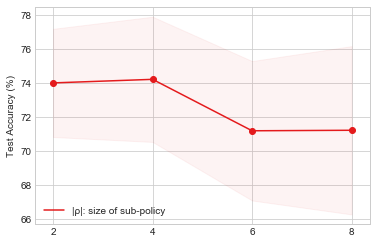

In [4]:
colormap = mpl.cm.Set1.colors
plt.style.use('seaborn-whitegrid')

x = [2, 4, 6, 8]
acc = np.array([74.01736667, 74.22666, 71.2041266666666, 71.23382667])
std = np.array([3.177711758, 3.67846144283177, 4.09633922268272, 4.944713624])

# fig = plt.figure(figsize=(6, 3))
fig = plt.figure()
ax = fig.add_subplot(111)
ax.fill_between(x, acc + std, acc - std, color=colormap[0], alpha=0.05)

imdb, = ax.plot(x, acc, color=colormap[0])

ax.scatter(x, acc, color=colormap[0])

ax.legend([imdb], [r'|ρ|: size of sub-policy'], loc='lower left')  # use Latex in plt
ax.set_xticks(x)
# ax.set_xlabel(r'Number of operations in one sub-policy')
ax.set_ylabel('Test Accuracy (%)')
# plt.savefig(r"E:\imdb_structure.pdf", bbox_inches='tight')  # save as pdf
plt.show()

## 双栏折线图

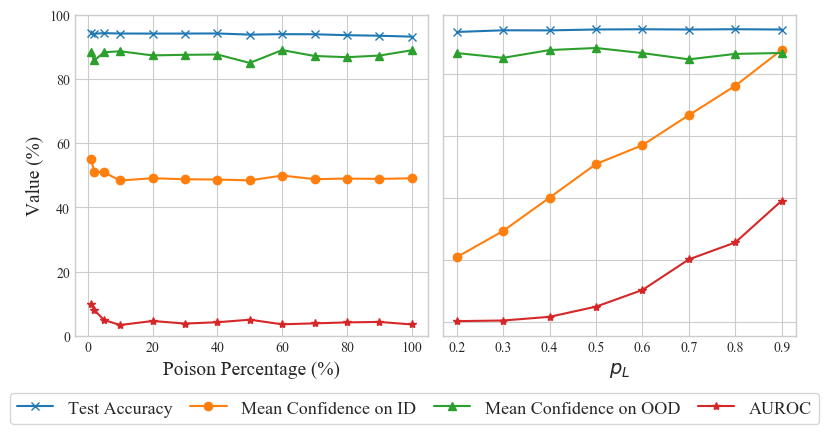

In [23]:
pp_poison_accs = [94.18,94.06,94.24, 94.12,94.10,94.11,94.14,93.78,93.92,93.89,93.60,93.43,93.15]
pp_clean_accs = [94.56,94.31,94.66, 94.26, 94.25,94.19,94.05,94.00,94.11, 93.95,93.61,93.42,93.22]
pp_poison_confidence_id = [55.04,51.10,50.87,48.35, 49.05,48.74,48.64, 48.39,49.89,48.77,48.94,48.85,49.04]
pp_poison_confidence_ood = [88.25,85.72,88.28,88.59, 87.31,87.49,87.58,  84.96,88.96,87.12,86.75,87.25,88.91]
pp_aurocs = [9.86,8.01,4.90,3.34,4.59,3.79,4.20,4.99,3.56,3.85,4.15,4.30,3.51]

pl_poison_accs = [93.44, 93.98, 93.95, 94.24, 94.31, 94.23, 94.32, 94.23]
pl_poison_confidence_id = [20.85,29.31,40.05,50.87,56.95,66.63,76.09,87.67]
pl_poison_confidence_ood = [86.64,85.10,87.61,88.28,86.63,84.62,86.37,86.67]
pl_aurocs = [0.23,0.43,1.62,4.90,10.27,20.14,25.59,39.06]

pp = [1, 2, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
pl = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

fig = plt.figure(figsize=(8, 4))
ax1 = fig.add_subplot(121)
ax1.plot(pp,pp_poison_accs, '-x', label='Test Accuracy')
ax1.plot(pp,pp_poison_confidence_id, '-o', label='Mean Confidence on ID')  
ax1.plot(pp,pp_poison_confidence_ood, '-^', label='Mean Confidence on OOD')  
ax1.plot(pp,pp_aurocs, '-*', label='AUROC')

ax1.xaxis.set_major_formatter(FormatStrFormatter('%d'))
ax1.yaxis.set_major_formatter(FormatStrFormatter('%d'))

ax1.set_ylim(0, 100) 

ax1.set_xlabel('Poison Percentage (%)', fontsize=14)
ax1.set_ylabel('Value (%)', fontsize=14)


ax2 = fig.add_subplot(122)
ax2.plot(pl,pl_poison_accs, '-x',label='Test Accuracy ')
ax2.plot(pl,pl_poison_confidence_id, '-o', label='Mean Confidence on ID')  
ax2.plot(pl,pl_poison_confidence_ood, '-^', label='Mean Confidence on OOD')  
ax2.plot(pl,pl_aurocs,'-*', label='AUROC')
ax2.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax2.yaxis.set_major_formatter(FormatStrFormatter('%d'))
ax2.set_yticklabels([])
ax2.set_xlim(0.17, 0.93)
ax2.xaxis.set_major_locator(MultipleLocator(0.1))
ax2.set_xlabel('$p_L$', fontsize=14)

plt.subplots_adjust(wspace=0.2)
fig.tight_layout()
plt.legend(["Test Accuracy", 'Mean Confidence on ID', 'Mean Confidence on OOD', 'AUROC'], 
           loc='upper center', bbox_to_anchor=(-0.08, -0.15), fancybox=True, shadow=False, ncol=4, 
           fontsize=13, frameon=True, columnspacing=1)
# plt.savefig('ablation.pdf', bbox_inches='tight', dpi=400)
plt.show()

## 直方图

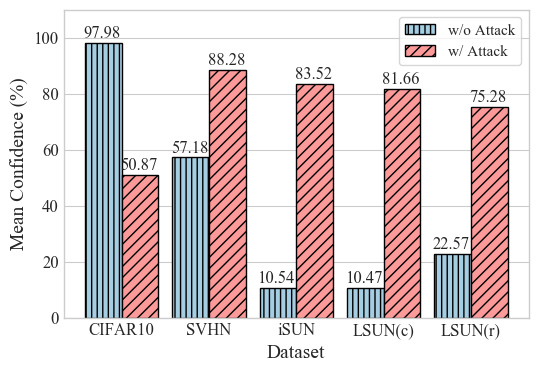

In [21]:
colormap = mpl.cm.Paired.colors
plt.style.use('seaborn-whitegrid')
plt.rcParams["font.family"] = "Times New Roman"

width=0.42
x = np.array([1, 1.5, 2, 2.5, 3])  # the label locations

vkd  = np.array([97.98, 57.18, 10.54, 10.47, 22.57] ) # 0.157])
v_les_05 = np.array([50.87, 88.28, 83.52, 81.66, 75.28])

fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(111)

rects1 = ax.bar(x - width/4, vkd , width/2, hatch='|||', color=colormap[0], alpha=1.0, edgecolor='black')
rects2 = ax.bar(x + width/4 , v_les_05, width/2,  alpha=1.0, hatch=r'///', color=colormap[4], edgecolor='black')

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('%.2f' % (height),
                    xy=(rect.get_x() + rect.get_width() / 2 -0.005, height),
                    xytext=(0, 1),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=12)

autolabel(rects1)
autolabel(rects2)

ax.legend([ "w/o Attack", "w/ Attack" ],  loc='best', fontsize=11, frameon=True)
# ax.set_xticklabels(["AG News", "THUCNews"])
plt.xticks([1, 1.5, 2, 2.5, 3], ["CIFAR10", "SVHN", "iSUN", "LSUN(c)", "LSUN(r)"], size='small')
# ax.set_xlabel(r'Number of operations in one sub-policy')
ax.set_ylabel('Mean Confidence (%)', fontsize=14)
ax.set_xlabel('Dataset', fontsize=14)
# ax.grid(which='minor', axis='both')

ax.set_ylim(0, 110) 
# ax.set_xlim(, 4) 
ax.yaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)
# plt.axis('off')
plt.grid(axis='x')
# ax.set(facecolor = "blue", alpha=0.8)
# plt.savefig("scores.pdf", bbox_inches='tight', dpi=400)
plt.show()

## Attention 热力图

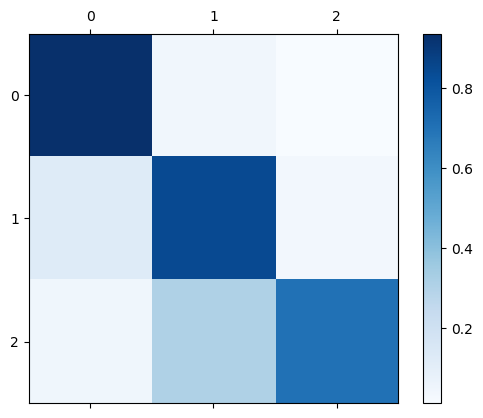

In [16]:
import pandas as pd

def softmax(x):
    '''Compute softmax values for each sets of scores in x.'''
    e_x = np.exp(x - np.max(x, axis=1)[:, np.newaxis])
    return e_x / e_x.sum(axis=1)


def plot_attention_heatmap(data, columns, index, figname='attn.png', tick_spacing=1):
    df = pd.DataFrame(data, columns=columns, index=index)
    
    fig = plt.figure()

    ax = fig.add_subplot(111)

    cax = ax.matshow(df, interpolation='nearest', cmap='Blues')
    
    fig.colorbar(cax)

    ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))

    ax.set_xticklabels([''] + list(df.columns))
    ax.set_yticklabels([''] + list(df.index))
    # plt.savefig(figname)
    
    plt.show()


def plot_attention_heatmap_for_multimodal(data, columns, index, figname='attn.png'):
    '''
    use picture as tick labels: https://stackoverflow.com/questions/44246650/automating-bar-charts-plotting-to-show-country-flags-as-ticklabels
    data: attention map tensor
    columns / index: list of token or images_to_plot (which is a dict like {regions, example_id}, where regions is
                        a list of ndarray which is cropped from an image loaded by plt.imread)
    '''

    def _annotation_boxes(images_to_plot, boxes_type, xybox, ax):
        regions = images_to_plot['regions']
        image_boxes = []
        for i, region in enumerate(regions):
            image_box = OffsetImage(region, zoom=0.2)
            image_box.image.ax = ax
            # OffsetImage is a sub-class of Artist, and has get_tight_box method, while AnnotationBbox is not.
            # see https://matplotlib.org/3.3.2/api/artist_api.html
            image_boxes.append(image_box)
            if boxes_type == 'columns':
                xy = (0, i)
            elif boxes_type == 'index':
                xy = (i, 0)
            else:
                raise ValueError()
            ab = AnnotationBbox(image_box, xy, xybox=xybox, frameon=False,
                                xycoords='data', boxcoords="offset points", pad=0)
            ax.add_artist(ab)

    df = pd.DataFrame(data, columns=['%d' % d for d in range(data.shape[1])],
                      index=['%d' % d for d in range(data.shape[0])])

    fig = plt.figure(figsize=(14, 12))
    ax = fig.add_subplot(111)
    cax = ax.matshow(df, interpolation='nearest', cmap='hot_r')
    fig.colorbar(cax)

    tick_spacing = 1
    ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))

    image_boxes = []
    if type(columns) == dict and type(index) == dict:
        image_id = columns['image_id']
        ax.set_title(image_id)
        image_boxes += _annotation_boxes(columns, 'columns', (-100, 0), ax)
        image_boxes += _annotation_boxes(index, 'index', (0, 100), ax)
    elif type(columns) == dict:
        image_id = columns['image_id']
        ax.set_title(image_id)
        image_boxes += _annotation_boxes(columns, 'columns', (-100, 0), ax)
        plt.xticks(rotation=45)
        ax.set_xticklabels([''] + index)
    elif type(index) == dict:
        image_id = index['image_id']
        ax.set_title(image_id)
        image_boxes += _annotation_boxes(index, 'index', (0, 100), ax)
        ax.set_yticklabels([''] + columns)
    else:
        plt.xticks(rotation=45)
        ax.set_xticklabels([''] + columns)
        ax.set_yticklabels([''] + index)
        image_boxes = None

    plt.savefig(figname, bbox_extra_artists=image_boxes, bbox_inches='tight')


plt.style.use('default')
data = np.array([[5, 2, 1],
                 [4, 6, 3],
                 [2, 4, 5]])
data = softmax(data)
plot_attention_heatmap(data, ['%d' % i for i in range(data.shape[1])], ['%d' % i for i in range(data.shape[0])])
# for pytorch
# plot_attention_heatmap(data, ['%d' % i for i in range(data.size(1))], ['%d' % i for i in range(data.size(0))])

## tSNE 降维

C:\Users\shuhuai\Anaconda3\lib\site-packages\sklearn\manifold\t_sne.py:344: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  error = np.finfo(np.float).max
C:\Users\shuhuai\Anaconda3\lib\site-packages\sklearn\manifold\t_sne.py:345: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  best_error = np.finfo(np.float).max
C:\Users\shuhuai\Anaconda3\li

Org data dimension is 10. Embedded data dimension is 2


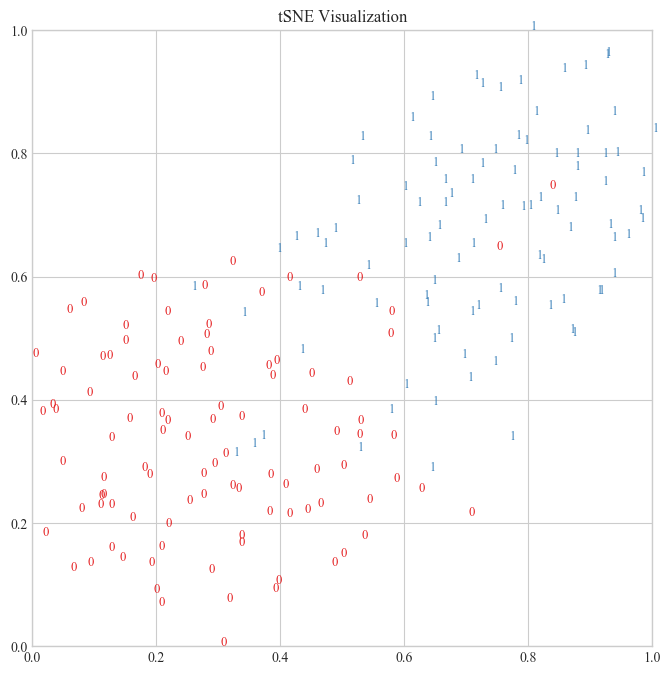

In [49]:
from sklearn import manifold

def t_sne(x, y, figure_name):
    '''
    x is a datamat, type is ndarray, shape(x)[0] reps the number of data, shape(x)[1] reps the ori dim of a data
    y is labels, type is array, shape(y)[0] reps the number of labels of data.
    '''
    tsne = manifold.TSNE(n_components=2, init='pca', random_state=501)
    x_tsne = tsne.fit_transform(x)
    print("Org data dimension is {}. Embedded data dimension is {}".format(x.shape[-1], x_tsne.shape[-1]))

    x_min, x_max = x_tsne.min(0), x_tsne.max(0)
    x_norm = (x_tsne - x_min) / (x_max - x_min)  # normalization
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111)
    for i in range(x_norm.shape[0]):
        ax.text(x_norm[i, 0], x_norm[i, 1], str(y[i]), color=plt.cm.Set1(y[i]),
                 fontdict={'weight': 'bold', 'size': 9})
    ax.set_title(figure_name, fontweight="bold")
    ax.grid(True)
#     plt.xticks([])
#     plt.yticks([])
    plt.show()

plt.style.use('seaborn-whitegrid')
plt.rcParams["font.family"] = "Times New Roman"
s1 = np.random.normal(-0.1, 0.1, [100, 10])
s2 = np.random.normal(0, 0.1, [100, 10])
s = np.concatenate((s1, s2), dtype=np.float32)
label = np.array([0] * 100 + [1] * 100)

t_sne(s, label, 'tSNE Visualization')